In [1]:
import numpy as np
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)
from numpy.random import seed
seed(123)

2.8.2
2.8.0


# Zad
Porównaj wyniki działań różnych optymalizacji
* 
```python
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
```
* 
```python
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
```
* 
```python
RMSprop = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
```
* 
```python
Adagrad = keras.optimizers.Adagrad(learning_rate=0.01)
```
* 
```python
Adadelta = keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```

https://keras.io/optimizers/

In [3]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('https://raw.githubusercontent.com/przem85/podstawy_sztucznej_inteligencji/main/Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:




dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
X_test.shape

(30162, 41)


(15060, 41)

# SGD

In [5]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_sgd = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [6]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [7]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_sgd])

Epoch 1/100
943/943 [==============================] - 2s 2ms/step - loss: 0.5380 - accuracy: 0.7512 - val_loss: 0.4481 - val_accuracy: 0.7557
Epoch 2/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3642 - accuracy: 0.8271 - val_loss: 0.3433 - val_accuracy: 0.8411
Epoch 3/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3387 - accuracy: 0.8411 - val_loss: 0.3543 - val_accuracy: 0.8379
Epoch 4/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3336 - accuracy: 0.8438 - val_loss: 0.3317 - val_accuracy: 0.8438
Epoch 5/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3305 - accuracy: 0.8450 - val_loss: 0.3312 - val_accuracy: 0.8478
Epoch 6/100
943/943 [==============================] - 1s 2ms/step - loss: 0.3291 - accuracy: 0.8448 - val_loss: 0.3296 - val_accuracy: 0.8457
Epoch 7/100
943/943 [==============================] - 1s 2ms/step - loss: 0.3277 - accuracy: 0.8467 - val_loss: 0.3305 - val_accuracy: 0.8441

In [8]:
history_sgd.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

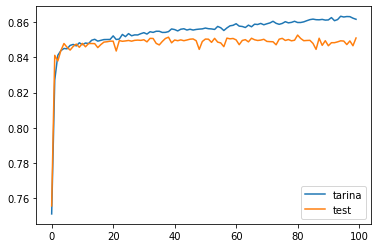

In [9]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

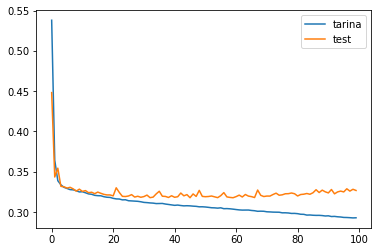

In [10]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['loss'], label = "tarina")
plt.plot(history_sgd.history['val_loss'], label = "test")
plt.legend()
plt.show()

# RMSprop

In [11]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_sgd = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4200      
                                                                 
 dense_5 (Dense)             (None, 50)                5050      
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [12]:
sgd = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"])

In [13]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_sgd])

Epoch 1/100
943/943 [==============================] - 3s 2ms/step - loss: 0.3870 - accuracy: 0.8254 - val_loss: 0.3467 - val_accuracy: 0.8392
Epoch 2/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3389 - accuracy: 0.8428 - val_loss: 0.3503 - val_accuracy: 0.8430
Epoch 3/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3319 - accuracy: 0.8475 - val_loss: 0.3317 - val_accuracy: 0.8469
Epoch 4/100
943/943 [==============================] - 1s 2ms/step - loss: 0.3286 - accuracy: 0.8467 - val_loss: 0.3286 - val_accuracy: 0.8485
Epoch 5/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3265 - accuracy: 0.8469 - val_loss: 0.3281 - val_accuracy: 0.8471
Epoch 6/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3259 - accuracy: 0.8485 - val_loss: 0.3295 - val_accuracy: 0.8471
Epoch 7/100
943/943 [==============================] - 1s 2ms/step - loss: 0.3247 - accuracy: 0.8483 - val_loss: 0.3288 - val_accuracy: 0.8483

In [14]:
history_sgd.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

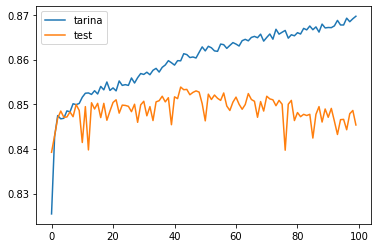

In [15]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

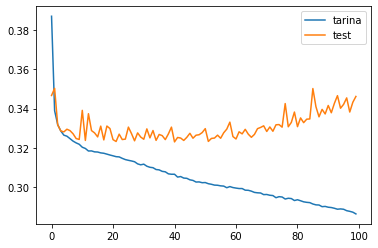

In [16]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['loss'], label = "tarina")
plt.plot(history_sgd.history['val_loss'], label = "test")
plt.legend()
plt.show()

# Adagrad

In [17]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_sgd = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               4200      
                                                                 
 dense_9 (Dense)             (None, 50)                5050      
                                                                 
 dense_10 (Dense)            (None, 10)                510       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [18]:
sgd = Adagrad = keras.optimizers.Adagrad(learning_rate=0.01)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"])

In [19]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_sgd])

Epoch 1/100
943/943 [==============================] - 3s 3ms/step - loss: 0.5575 - accuracy: 0.7511 - val_loss: 0.5479 - val_accuracy: 0.7543
Epoch 2/100
943/943 [==============================] - 2s 2ms/step - loss: 0.5416 - accuracy: 0.7511 - val_loss: 0.5257 - val_accuracy: 0.7543
Epoch 3/100
943/943 [==============================] - 2s 2ms/step - loss: 0.5042 - accuracy: 0.7511 - val_loss: 0.4715 - val_accuracy: 0.7543
Epoch 4/100
943/943 [==============================] - 2s 2ms/step - loss: 0.4400 - accuracy: 0.7601 - val_loss: 0.4084 - val_accuracy: 0.7897
Epoch 5/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3913 - accuracy: 0.8156 - val_loss: 0.3757 - val_accuracy: 0.8292
Epoch 6/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3686 - accuracy: 0.8325 - val_loss: 0.3614 - val_accuracy: 0.8363
Epoch 7/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3579 - accuracy: 0.8347 - val_loss: 0.3544 - val_accuracy: 0.8380

In [20]:
history_sgd.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

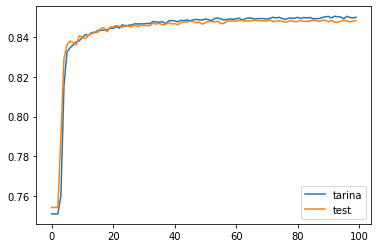

In [21]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

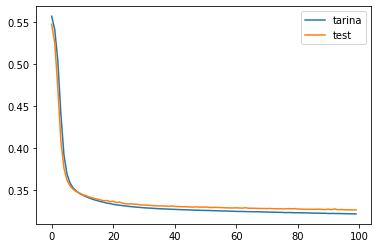

In [22]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['loss'], label = "tarina")
plt.plot(history_sgd.history['val_loss'], label = "test")
plt.legend()
plt.show()

# Adadelta

In [23]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_sgd = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               4200      
                                                                 
 dense_13 (Dense)            (None, 50)                5050      
                                                                 
 dense_14 (Dense)            (None, 10)                510       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [24]:
sgd = keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"])

In [25]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_sgd])

Epoch 1/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3923 - accuracy: 0.8183 - val_loss: 0.3450 - val_accuracy: 0.8376
Epoch 2/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3390 - accuracy: 0.8420 - val_loss: 0.3373 - val_accuracy: 0.8420
Epoch 3/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3330 - accuracy: 0.8450 - val_loss: 0.3316 - val_accuracy: 0.8459
Epoch 4/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3294 - accuracy: 0.8473 - val_loss: 0.3297 - val_accuracy: 0.8464
Epoch 5/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3266 - accuracy: 0.8477 - val_loss: 0.3278 - val_accuracy: 0.8483
Epoch 6/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3248 - accuracy: 0.8487 - val_loss: 0.3280 - val_accuracy: 0.8465
Epoch 7/100
943/943 [==============================] - 1s 2ms/step - loss: 0.3231 - accuracy: 0.8483 - val_loss: 0.3253 - val_accuracy: 0.8501

In [26]:
history_sgd.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

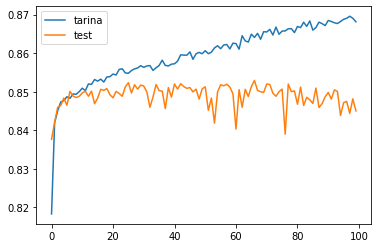

In [27]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

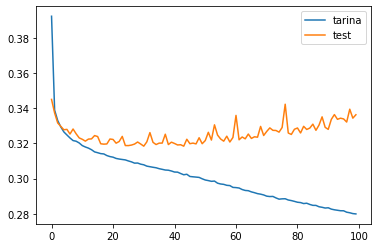

In [28]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['loss'], label = "tarina")
plt.plot(history_sgd.history['val_loss'], label = "test")
plt.legend()
plt.show()

# Adam

In [29]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_sgd = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               4200      
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                                 
 dense_18 (Dense)            (None, 10)                510       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [30]:
sgd = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"])

In [31]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_sgd])

Epoch 1/100
943/943 [==============================] - 2s 2ms/step - loss: 0.4032 - accuracy: 0.8132 - val_loss: 0.3468 - val_accuracy: 0.8414
Epoch 2/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3382 - accuracy: 0.8431 - val_loss: 0.3339 - val_accuracy: 0.8473
Epoch 3/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3291 - accuracy: 0.8473 - val_loss: 0.3275 - val_accuracy: 0.8477
Epoch 4/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3245 - accuracy: 0.8483 - val_loss: 0.3311 - val_accuracy: 0.8435
Epoch 5/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3223 - accuracy: 0.8495 - val_loss: 0.3310 - val_accuracy: 0.8449
Epoch 6/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3208 - accuracy: 0.8505 - val_loss: 0.3224 - val_accuracy: 0.8489
Epoch 7/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3191 - accuracy: 0.8504 - val_loss: 0.3237 - val_accuracy: 0.8471

In [32]:
history_sgd.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

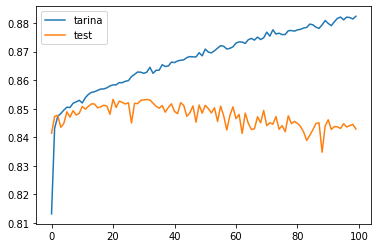

In [33]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

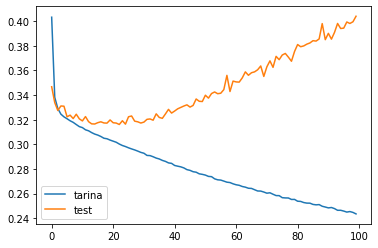

In [34]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['loss'], label = "tarina")
plt.plot(history_sgd.history['val_loss'], label = "test")
plt.legend()
plt.show()